In [1]:
# ライブラリの読み込み
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# irisデータの読み込み
df = sns.load_dataset("iris")
df_x = df.drop('species', axis=1)

In [7]:
# クラスター間の距離を算出
Z = linkage(df_x)
Z

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+01, 1.52000000e+02, 1.41421356e-01, 3.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.56000000e+02, 1.57000000e+02, 1.41421356e-01, 5.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e

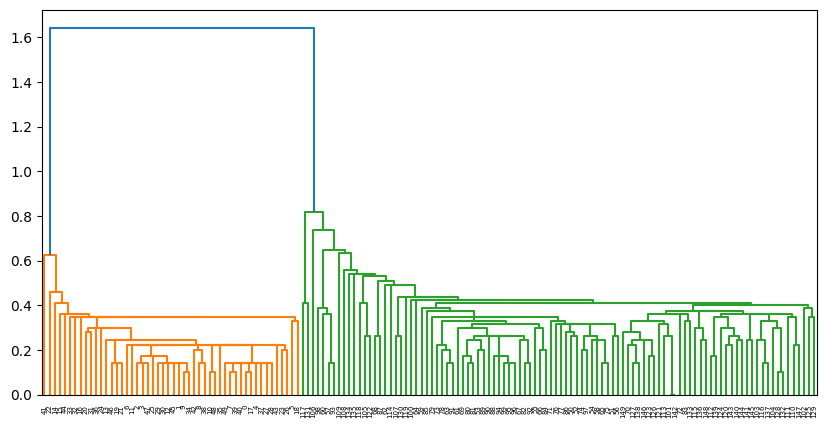

In [8]:
# デンドログラムをプロット
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

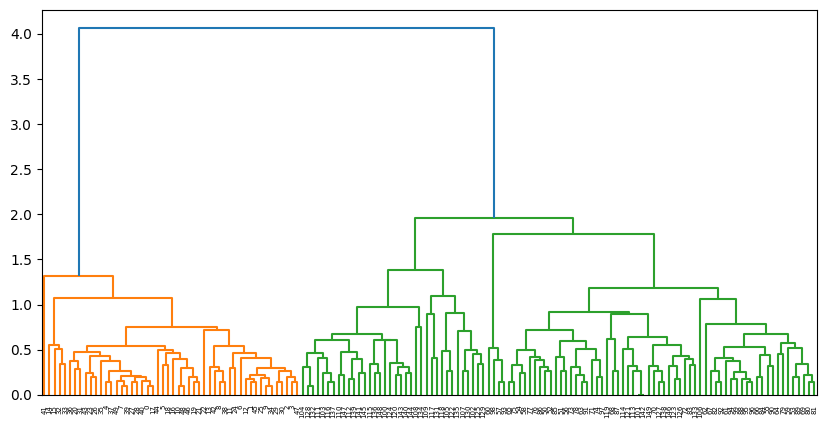

In [10]:
# 各クラスター間のそれぞれの要素の距離の平均を取ったものをクラスター間の距離とする(群平均法)
Z = linkage(df_x, method="average")
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

In [11]:
# 閾値を1.5にしてクラスタ分け
threshold = 1.5
clustered = fcluster(Z, threshold, criterion='distance')
clustered

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4], dtype=int32)

In [12]:
# クラスターを元データに結合
df = pd.concat([df, pd.DataFrame(clustered).rename(columns={0:"cluster"})], axis=1)

In [13]:
print("setosa")
print(df[df["species"] == "setosa"]["cluster"].value_counts())
print("virginica")
print(df[df["species"] == "virginica"]["cluster"].value_counts())
print("versicolor")
print(df[df["species"] == "versicolor"]["cluster"].value_counts())

setosa
1    50
Name: cluster, dtype: int64
virginica
2    36
4    14
Name: cluster, dtype: int64
versicolor
4    46
3     4
Name: cluster, dtype: int64
